In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
%matplotlib inline

In [2]:
grid = nc.Dataset('/mnt/storage0/jacquielee/research/CDFTOOLS/trpiso.nc')

In [3]:
grid.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  valid_min: -179.998
                  valid_max: 179.999
                  long_name: Longitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling off), (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  valid_min: -20.0761
                  valid_max: 89.9591
                  long_name: Latitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling off), (u'depthu', <type 'netCDF4._netCDF4.Variable'>
              float32 depthu(depthu)
                  units: m
                  positive: unknown
                  valid_min: 0.0
                  valid_max: 50.0
     

In [4]:
navLon=grid.variables['nav_lon'][:,:]
navLat=grid.variables['nav_lat'][:,:]
zonal_trp = grid.variables['soualz'][0,:,:]
merid_trp = grid.variables['sovacz'][0,:,:]

In [5]:
merid_trp.max()

23820654.0

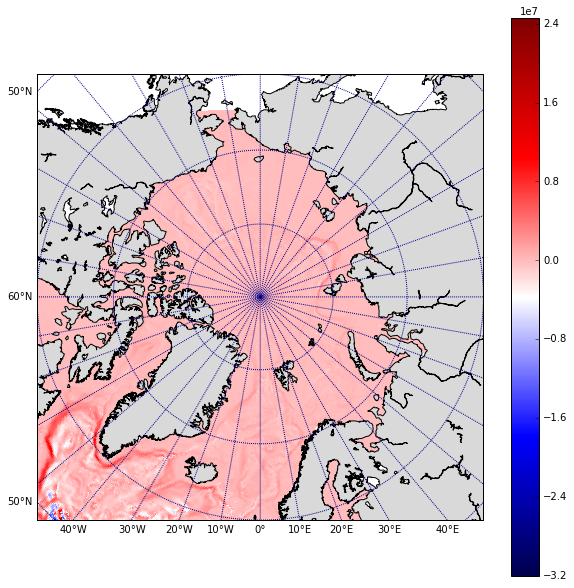

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False, ax=axes)
m.drawcoastlines()
cmap = plt.get_cmap('seismic')
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
#x_lon, y_lat = m(x[:,],y[:,])
#x_lon, y_lat = np.meshgrid(navLon, navLat)
X,Y = m(navLon, navLat)
m = m.pcolor(X,Y,zonal_trp[:,:],cmap=cmap)
             #norm=colors.SymLogNorm(linthresh=0.00000001, 
              #                                linscale=0.00000001,vmin=-10, vmax=10))
cbar = fig.colorbar(m,ax=axes)

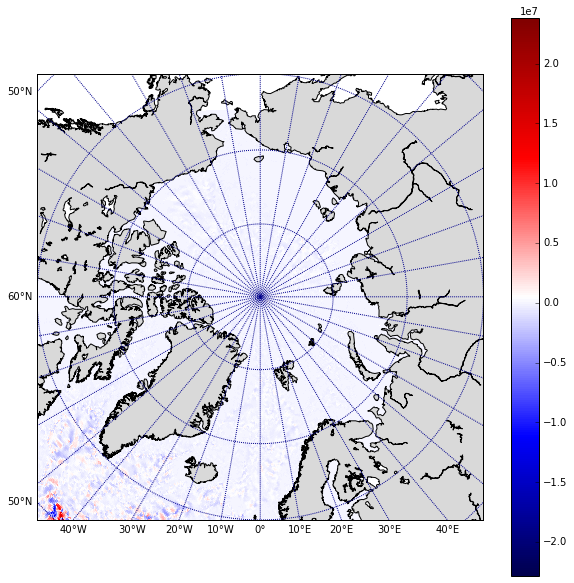

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False, ax=axes)
m.drawcoastlines()
cmap = plt.get_cmap('seismic')
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
#x_lon, y_lat = m(x[:,],y[:,])
#x_lon, y_lat = np.meshgrid(navLon, navLat)
X,Y = m(navLon, navLat)
m = m.pcolor(X,Y,merid_trp[:,:],cmap=cmap)
             #norm=colors.SymLogNorm(linthresh=0.00000001, 
              #                                linscale=0.00000001,vmin=-1, vmax=0.0))
cbar = fig.colorbar(m,ax=axes)